In [3]:
""" 
1 - Baixe o DataSet em Anexo
2 - Pesquise o funcionamento da técnica de codificação de atributos categóricos chamado LabelEncoder
3 - Crie um Notebook na linguagem de sua preferência e carregue o DataSet para um Data Frame chamado df_original
4 - Faça uma cópia do Data Frame com nome de df_no_salary
5 - A partir df_no_salary, remova o atributo salary 
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score, accuracy_score, roc_curve


df_original = pd.read_csv('data\Placement_Data_Full_Class.csv',sep=',')

df_no_salary = df_original.copy().drop('salary', axis=1)

df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
""" A partir de agora iremos fazer uma análise exploratória para elucidar a 
diferença salarial entre homens e mulheres, em especial na área de técnologia. """
#Desvio padrão do salário
print(df_original['salary'].std()) #Desvio Padrão
"""Elucida um grande desvio, desigualdade entre os salários mais baixos e os mais altos."""

93457.45241958875


'Elucida um grande desvio, desigualdade entre os salários mais baixos e os mais altos.'

In [5]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
# Estastísticas de cada coluna
print(df_original.describe())

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [6]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
#Análise dos maiores salários baseados em sexo
df_no_salary_analise = df_original[['salary','gender']]
df_no_salary_analise = df_no_salary_analise.sort_values(by="salary", ascending=False)
df_degree_t = df_original[['degree_t','gender','salary']]
df_no_salary_analise.head()
""" Predominância masculina entre os maiores salários """

' Predominância masculina entre os maiores salários '

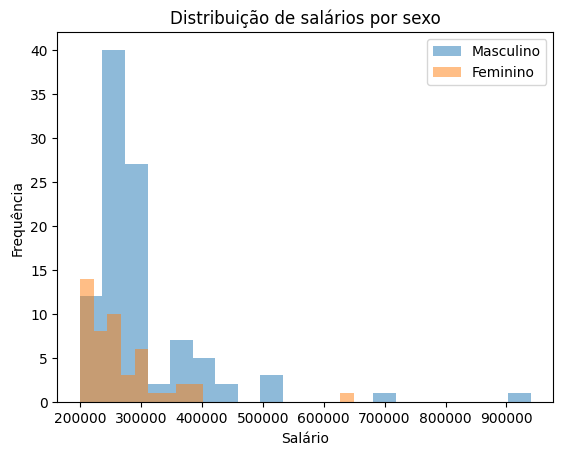

' Percebemos além de uma disparidade da quantidade entre mulheres e homens no dataset o fato de que há mais \nocorrência de homens com salários maiores do que mulheres. E que mulheres possuem uma frequência maior que\nos homens quando se trata do menor salário. '

In [7]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
# Diferença salarial entre homens e mulheres
masculino = df_no_salary_analise[df_no_salary_analise['gender'] == 'M']
feminino = df_no_salary_analise[df_no_salary_analise['gender'] == 'F']

fig, ax = plt.subplots()

ax.hist(masculino['salary'], bins=20, alpha=0.5, label='Masculino')
ax.hist(feminino['salary'], bins=20, alpha=0.5, label='Feminino')

ax.set_title('Distribuição de salários por sexo')
ax.set_xlabel('Salário')
ax.set_ylabel('Frequência')
ax.legend()
plt.show()
""" Percebemos além de uma disparidade da quantidade entre mulheres e homens no dataset o fato de que há mais 
ocorrência de homens com salários maiores do que mulheres. E que mulheres possuem uma frequência maior que
os homens quando se trata do menor salário. """

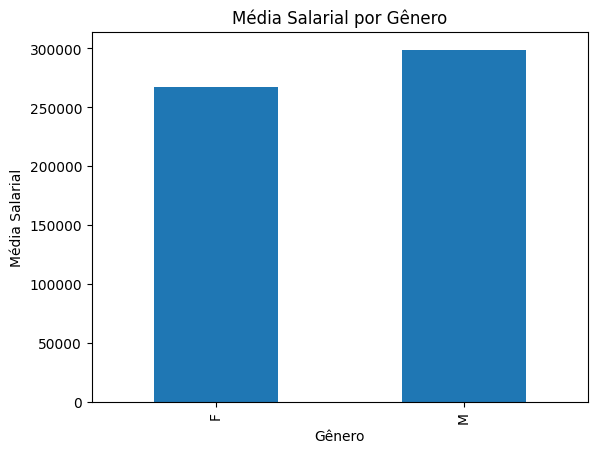

' Gráfico mostra que homens possuem uma média salarial maior que as mulheres. '

In [8]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
# Media de salario de mulheres e o homens
media_por_genero = df_no_salary_analise.groupby('gender')['salary'].mean()

media_por_genero.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Média Salarial')
plt.title('Média Salarial por Gênero')
plt.show()
""" Gráfico mostra que homens possuem uma média salarial maior que as mulheres. """

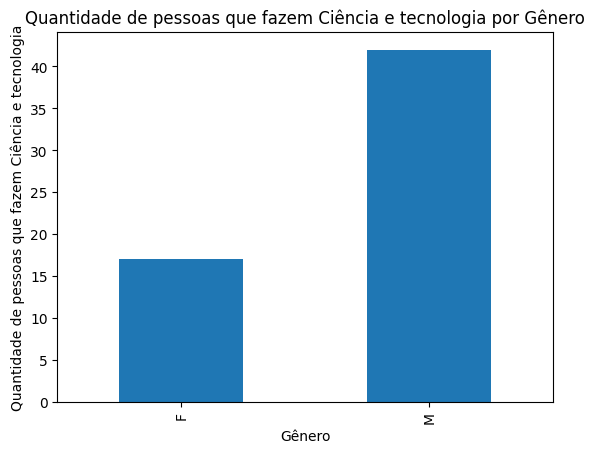

' Dados motram que existe uma grande diferença entre pessoas que atuam no ramo da ciência e de técnologia\ncomparada aos homens, mas isso pode ser causado pela diferença da quantidade de pessoas nessa categoria. '

In [9]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
# Quantidade de pessoas que fazem SCI&TECH por Gênero
tecnologia = df_degree_t[df_degree_t['degree_t'] == 'Sci&Tech']
media_sci = tecnologia.groupby('gender')['degree_t'].size()
media_sci.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de pessoas que fazem Ciência e tecnologia')
plt.title('Quantidade de pessoas que fazem Ciência e tecnologia por Gênero')
plt.show()
""" Dados motram que existe uma grande diferença entre pessoas que atuam no ramo da ciência e de técnologia
comparada aos homens, mas isso pode ser causado pela diferença da quantidade de pessoas nessa categoria. """

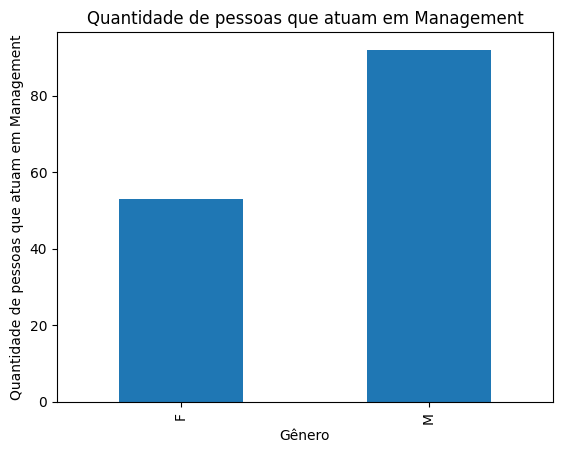

'Porém existe uma quantia maior de mulheres em outros campos, provando assim que, de fato, existe\numa taxa menor de mulheres atuam na área de tecnologia.'

In [10]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
tecnologia = df_degree_t[df_degree_t['degree_t'] == 'Comm&Mgmt']
media_sci = tecnologia.groupby('gender')['degree_t'].size()
media_sci.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de pessoas que atuam em Management')
plt.title('Quantidade de pessoas que atuam em Management')
plt.show()
"""Porém existe uma quantia maior de mulheres em outros campos, provando assim que, de fato, existe
uma taxa menor de mulheres atuam na área de tecnologia."""


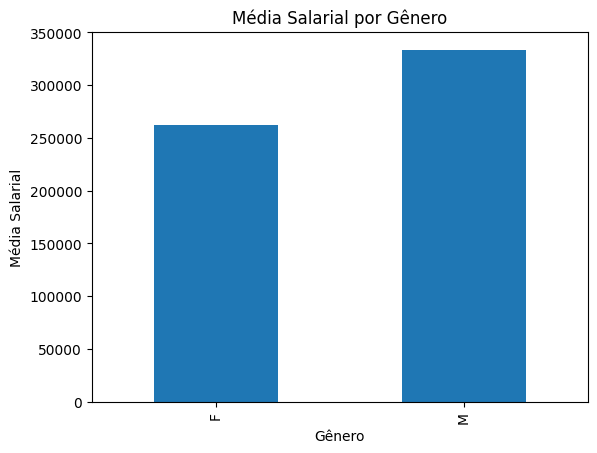

' A média salarial entre mulheres e homens no ramo de tecnologia é bem expressivo \nConcluímos que existe uma diferença salarial entre homens e mulheres, e ela é evidente. Apesar da diferença \nde entradaentre homens e mulheres no CSV existe uma diferença na quantidade de mulheres que fazem ciência e \ntécnologia e outras áreas. Que pode ou não ser causada pela diferença grande de salários entre homens e\nmulheres nessa área.'

In [11]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
tecnologia = df_degree_t[df_degree_t['degree_t'] == 'Sci&Tech']
media_por_genero = tecnologia.groupby('gender')['salary'].mean()
media_por_genero.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Média Salarial')
plt.title('Média Salarial por Gênero na área de Ciência e tecnologia')
plt.show()
""" A média salarial entre mulheres e homens no ramo de tecnologia é bem expressivo 
Concluímos que existe uma diferença salarial entre homens e mulheres, e ela é evidente. Apesar da diferença 
de entradaentre homens e mulheres no CSV existe uma diferença na quantidade de mulheres que fazem ciência e 
técnologia e outras áreas. Que pode ou não ser causada pela diferença grande de salários entre homens e
mulheres nessa área."""

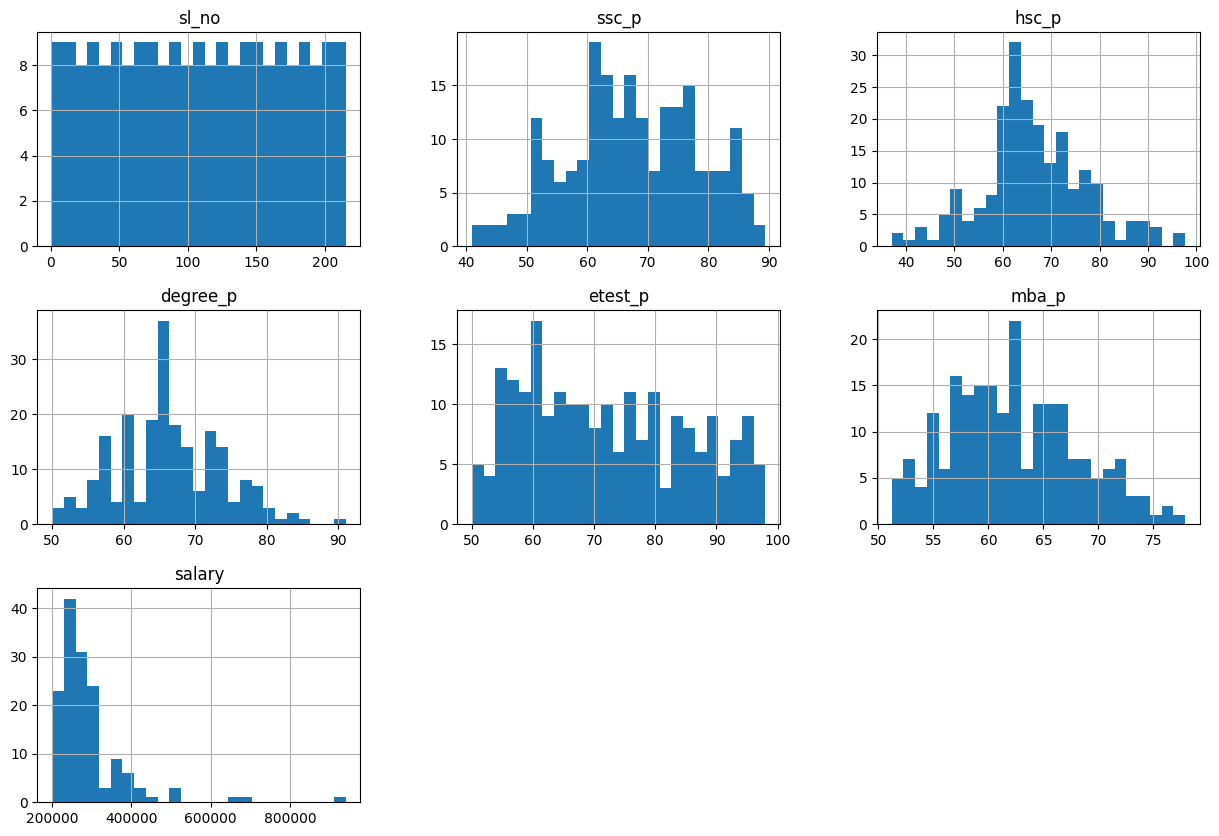

In [12]:
#6 - Faça uma análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)
#Histograma de médias de valores de cada coluna
df_original.hist(bins=25, figsize=(15,10))
plt.show()

In [13]:
#7 - Aplique o LabelEncoder nos atributos categóricos (gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status) de df_no_salary
# criando uma cópia do DataFrame df_no_salary
df_encoded = df_no_salary.copy()

# selecionando as colunas categóricas para aplicar o LabelEncoder
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# criando uma instância do LabelEncoder
le = LabelEncoder()

# aplicando o LabelEncoder em cada coluna categórica
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# exibindo o DataFrame com as colunas categóricas codificadas
print(df_encoded)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
3        4       1  56.00      0  52.00      0      2     52.00         2   
4        5       1  85.80      0  73.60      0      1     73.30         0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210    211       1  80.60      1  82.00      1      1     77.60         0   
211    212       1  58.00      1  60.00      1      2     72.00         2   
212    213       1  67.00      1  67.00      1      1     73.00         0   
213    214       0  74.00      1  66.00      1      1     58.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p  status  
0         0     55.0 

In [14]:
""" 8 - Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e 
treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo. """

le = LabelEncoder()
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
df_encoded['ssc_b'] = le.fit_transform(df_encoded['ssc_b'])
df_encoded['hsc_b'] = le.fit_transform(df_encoded['hsc_b'])
df_encoded['hsc_s'] = le.fit_transform(df_encoded['hsc_s'])
df_encoded['degree_t'] = le.fit_transform(df_encoded['degree_t'])
df_encoded['workex'] = le.fit_transform(df_encoded['workex'])
df_encoded['specialisation'] = le.fit_transform(df_encoded['specialisation'])
df_encoded['status'] = le.fit_transform(df_encoded['status'])

x = df_encoded.drop(['status'], axis=1)
y = df_encoded['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000, tol=0.001)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acc:.2f}')

Acurácia do modelo: 0.88


In [15]:
#9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.
#Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.90625


In [16]:
#9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.
#Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9354838709677419


In [17]:
#9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.
#AUC
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print(f'AUC: {auc:.2f}')

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

AUC: 0.94


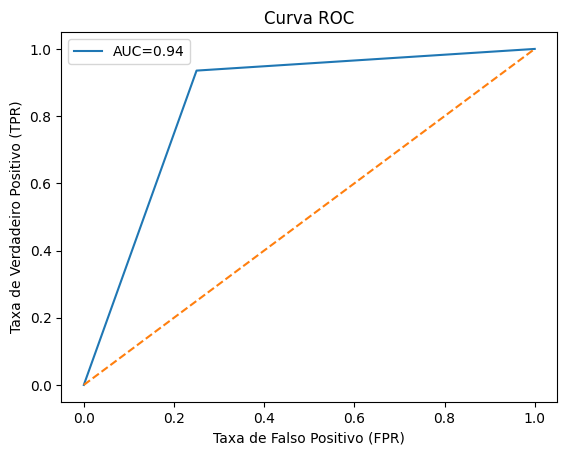

In [18]:
#9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Taxa de Falso Positivo (FPR)")
plt.ylabel("Taxa de Verdadeiro Positivo (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [19]:
""" O Recall, também conhecido como sensibilidade, mede a proporção de exemplos positivos (verdadeiros positivos + falsos negativos) 
que foram corretamente identificados como positivos (verdadeiros positivos). Ele é uma métrica útil quando queremos minimizar os falsos 
negativos, isto é, quando o custo de uma classificação incorreta de um exemplo positivo é muito alto. No nosso caso, um falso negativo seria 
um aluno que foi recolocado mas o modelo previu que não foi recolocado.

A Precision, por sua vez, mede a proporção de exemplos identificados como positivos (verdadeiros positivos + falsos positivos) que são realmente 
positivos (verdadeiros positivos). Ela é uma métrica útil quando queremos minimizar os falsos positivos, isto é, quando o custo de uma 
classificação incorreta de um exemplo negativo é muito alto. No nosso caso, um falso positivo seria um aluno que não foi recolocado mas o modelo 
previu que foi recolocado.

A curva ROC (Receiver Operating Characteristic) é uma curva que representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos 
para diferentes valores de limiar de classificação. Ela é uma métrica útil quando queremos avaliar o desempenho do modelo em diferentes níveis de 
especificidade e sensibilidade.

O AUC (Area Under the Curve) é a área sob a curva ROC e é uma métrica que varia de 0 a 1, sendo 1 o valor ideal. Ele representa a capacidade do 
modelo de distinguir entre exemplos positivos e negativos.

De maneira geral, bons resultados em Recall, Precision, ROC e AUC indicam que o modelo tem uma boa capacidade de classificação. 
No entanto, o valor ideal das métricas pode variar de acordo com o problema em questão e com as implicações dos falsos positivos e falsos negativos.
Portanto, é importante avaliar cada métrica de forma individual e em conjunto para determinar se os resultados obtidos pelo modelo são 
considerados bons ou ruins. """

' O Recall, também conhecido como sensibilidade, mede a proporção de exemplos positivos (verdadeiros positivos + falsos negativos) \nque foram corretamente identificados como positivos (verdadeiros positivos). Ele é uma métrica útil quando queremos minimizar os falsos \nnegativos, isto é, quando o custo de uma classificação incorreta de um exemplo positivo é muito alto. No nosso caso, um falso negativo seria \num aluno que foi recolocado mas o modelo previu que não foi recolocado.\n\nA Precision, por sua vez, mede a proporção de exemplos identificados como positivos (verdadeiros positivos + falsos positivos) que são realmente \npositivos (verdadeiros positivos). Ela é uma métrica útil quando queremos minimizar os falsos positivos, isto é, quando o custo de uma \nclassificação incorreta de um exemplo negativo é muito alto. No nosso caso, um falso positivo seria um aluno que não foi recolocado mas o modelo \npreviu que foi recolocado.\n\nA curva ROC (Receiver Operating Characteristic) é 

In [20]:
""" 10 - A partir de df_original, crie o Data Frame df_no_status agora removendo a coluna status,  aplicando o LabelEncoder, separe as amostras que não possuem o atributo salary (dados ausentes)
11 - Treine um modelo de regressão linear múltipla e preveja os salários (salary) das amostras que não possuem essa informação em df_no_status
12 - Para as amostras que não possuem o atributo salary preenchidos em df_no_status, inclua o valor previsto pelo modelo de regressão linear múltipla """
df_no_status = df_original.copy().drop('status', axis=1)

df_no_status = df_no_status.apply(le.fit_transform)

df_no_salary2 = df_no_status[df_no_status['salary'] == 0]

df_with_salary = df_no_status[df_no_status['salary'] != 0]

Treino1 = df_with_salary.drop('salary', axis=1)
Treino2 = df_with_salary['salary']

regressor = LinearRegression()
regressor.fit(Treino1, Treino2)

Treino1 = df_no_salary2.drop('salary', axis=1)
prevSal = regressor.predict(Treino1)

df_PrevSal = pd.DataFrame({'predicted_salary': prevSal}, index=df_no_salary2.index)

df_with_PrevSal = pd.concat([df_no_status, df_PrevSal], axis=1)

df_no_status.loc[df_no_status['salary'] == 0, 'salary'] = prevSal

df_no_status



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,1,46,1,93,1,1,14,2,0,9,1,64,19.000000
1,1,1,82,0,79,1,2,74,2,1,74,0,153,23.752211
2,2,1,42,0,51,0,0,27,0,0,55,0,50,12.000000
3,3,1,22,0,14,0,2,3,2,0,37,1,72,45.000000
4,4,1,98,0,70,0,1,65,0,0,96,0,28,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,1,85,1,84,1,1,76,0,0,83,0,199,36.000000
211,211,1,25,1,24,1,2,60,2,0,52,0,14,20.000000
212,212,1,46,1,49,1,1,64,0,1,25,0,179,27.000000
213,213,0,64,1,45,1,1,14,0,0,45,1,81,1.000000


In [21]:
#13 - Agora que você preencheu os dados ausentes do atributo salary de df_no_status, copie o atributos salary de df_no_status para df_origina
df_original.update(df_no_status['salary'])

df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,19.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,23.752211
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,12.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,45.000000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,36.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,20.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,27.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,1.000000


In [22]:
#14 - Treine o modelo de classificação selecionado em 8 agora com df_original, com o mesmo objetivo de prever a recolocação

df_original_encod = df_original.apply(le.fit_transform)



i = df_original_encod.drop('status', axis=1)
k = df_original_encod['status']


i_train, i_test, k_train, k_test = train_test_split(i, k, test_size=0.2, random_state=42)



clf.fit(i_train, k_train)

k_pred = clf.predict(i_test)

acc = accuracy_score(k_test, k_pred)

print(f'Acurácia do modelo: {acc:.2f}')

k_pred



Acurácia do modelo: 0.98


array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [23]:
#15 - Compare e comente os resultados obtidos em 9 com os resultados obtidos em 14

"""O primeiro gráfico a acurácia de um modelo de 0,88. Isso significa que o modelo acertou 88% das previsões que fez. Embora isso seja uma acurácia relativamente alta, ainda há espaço para melhorias no modelo.
O segundo gráfico mostra a acurácia de um modelo de 0,98. Isso significa que o modelo acertou 98% das previsões que fez, o que é uma acurácia muito alta. Isso indica que o modelo está funcionando muito bem e é capaz de fazer previsões precisas na maioria dos casos.
o segundo modelo é claramente superior ao primeiro em termos de acurácia.
Isso foi causado devido ao treinamento mais efetivo que o modelo recebeu."""

'O primeiro gráfico a acurácia de um modelo de 0,88. Isso significa que o modelo acertou 88% das previsões que fez. Embora isso seja uma acurácia relativamente alta, ainda há espaço para melhorias no modelo.\nO segundo gráfico mostra a acurácia de um modelo de 0,98. Isso significa que o modelo acertou 98% das previsões que fez, o que é uma acurácia muito alta. Isso indica que o modelo está funcionando muito bem e é capaz de fazer previsões precisas na maioria dos casos.\no segundo modelo é claramente superior ao primeiro em termos de acurácia.\nIsso foi causado devido ao treinamento mais efetivo que o modelo recebeu.'

In [24]:
""" Referências:
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
https://www.w3schools.com/python/matplotlib_intro.asp E todas as outras páginas sobre
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://www.knowledgehut.com/blog/data-science/eda-data-science
https://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812 """

' Referências:\nhttps://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/\nhttps://www.w3schools.com/python/matplotlib_intro.asp E todas as outras páginas sobre\nhttps://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/\nhttps://www.knowledgehut.com/blog/data-science/eda-data-science\nhttps://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812 '